# **Task 1: Prediction using Supervised ML**
## **Name: Stefan Lacher**
## **Data Science and Business Analytics Internship**


Tasks:


*   Predict the percentage of an student based on the no. of study hours.
*   This is a simple linear regression task as it involves just 2 variables.
*   What will be predicted score if a student studies for 9.25 hrs/ day?

Language: Python

Data: http://bit.ly/w-data 

# **General steps**

In [2]:
#import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics    

In [3]:
#Read the Data
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)


# **Understand the Data**

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The first five values of the data can be viewed here.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We have two columns "Hours" and "Scores" and 25 entries.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


As seen before, there are 25 entries each. An average of 5 hours are learned. The highest number of learning hours is over 9 hours.

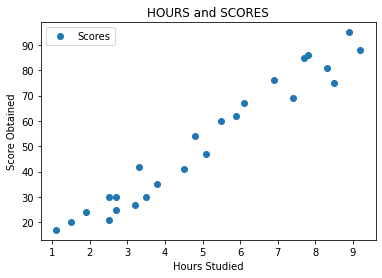

In [7]:
data.plot(x='Hours',y='Scores',style='o',)
plt.title("HOURS and SCORES")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.show()

Here a positive linearity can be recognized. The more hours of study, the higher the score. 

# **Data Cleaning**

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since no NULL values are recognized here, you can continue.

# **Data Preparation**

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In this step the columns were separated into X hours and y scores. In the next step, the data is divided into test and train.

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

# **Training**

In [16]:
#train the model
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

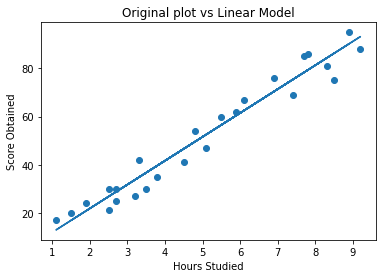

In [17]:
#Plotting the Original Data vs Linear Model
y_line=(regressor.coef_)*X + (regressor.intercept_)
plt.scatter(X,y)
plt.plot(X,y_line)
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.title("Original plot vs Linear Model")
plt.show()

# **Predictions**

In [20]:
#Predicting the scores
y_pred = regressor.predict(X_test)


In [23]:
#Compare the actual vs predicted Data
df = pd.DataFrame({'Hours': X_test.reshape(1,-1)[0], 'Actual': y_test, 'Predicted': y_pred})
print(df)

   Hours  Actual  Predicted
0    1.5      20  16.884145
1    3.2      27  33.732261
2    7.4      69  75.357018
3    2.5      30  26.794801
4    5.9      62  60.491033


# **Evaluation**

In [24]:
metrics.mean_absolute_error(y_test, y_pred)

4.183859899002982

The performance is tested here. In this case, the mean absolute error is around 4.2.

In [26]:
regressor.score(X_test, y_test)

0.9454906892105354

The Accuracy of the model ist arround 95 percent. 

# **Study time prediction**

In [40]:
Studytime = 9.25
Studytime_prediction = regressor.predict([[Studytime]])

print("Number of Hours = {}".format(Studytime))
print("Predicted Score =", Studytime_prediction[0])


Number of Hours = 9.25
Predicted Score = 93.69173248737539


Thus it can be said that if 9.25 hours are learned per day, a score of around 94 percent is expected.